## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import Prepared Data (Path)

path = r'/Users/ladyarmanoid/Documents/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 6/Book Recommendation Analysis/'

# Import data

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ratings_explicit.pkl'))

In [4]:
df.shape

(433671, 15)

In [5]:
df.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group,Rating category,Continent,yearRange
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006


In [6]:
df.dtypes

ISBN                  object
bookTitle             object
bookAuthor            object
yearOfPublication    float64
publisher             object
User-ID              float64
Book-Rating          float64
Location              object
Age                    int32
City                  object
Country               object
Age Group             object
Rating category       object
Continent             object
yearRange             object
dtype: object

In [7]:
# Removal of all the object columns

df = df.drop(columns =['ISBN','bookTitle','bookAuthor','publisher','Location','City','Country','Continent','Age Group','Rating category','yearRange'])

### 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-2822758886994076.0,
 -699158530550135.2,
 -316370638103751.0,
 -167400419976359.7,
 -109595645551687.61,
 -77173652983881.7,
 -55084118344136.94,
 -43231799569925.2,
 -33668655606529.168]

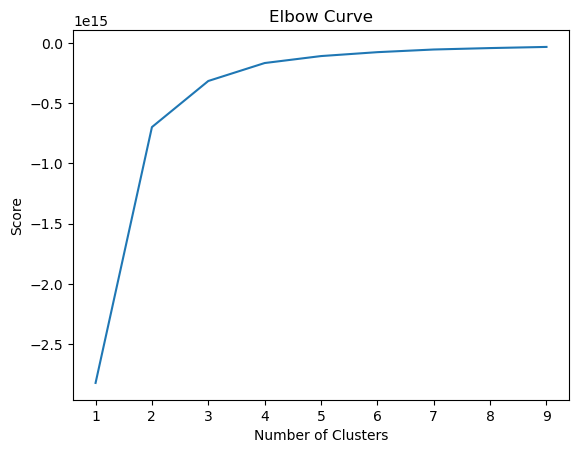

In [10]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### *Selection of the cluster*

- In the graph above, we can see a jump from two to three on the x-axis. After that, the curve straightens out, meaning that the most adequate count for the clusters is three.

In [11]:
### 3. k-means clustering.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df['clusters'].value_counts()

clusters
2    149157
0    144210
1    140304
Name: count, dtype: int64

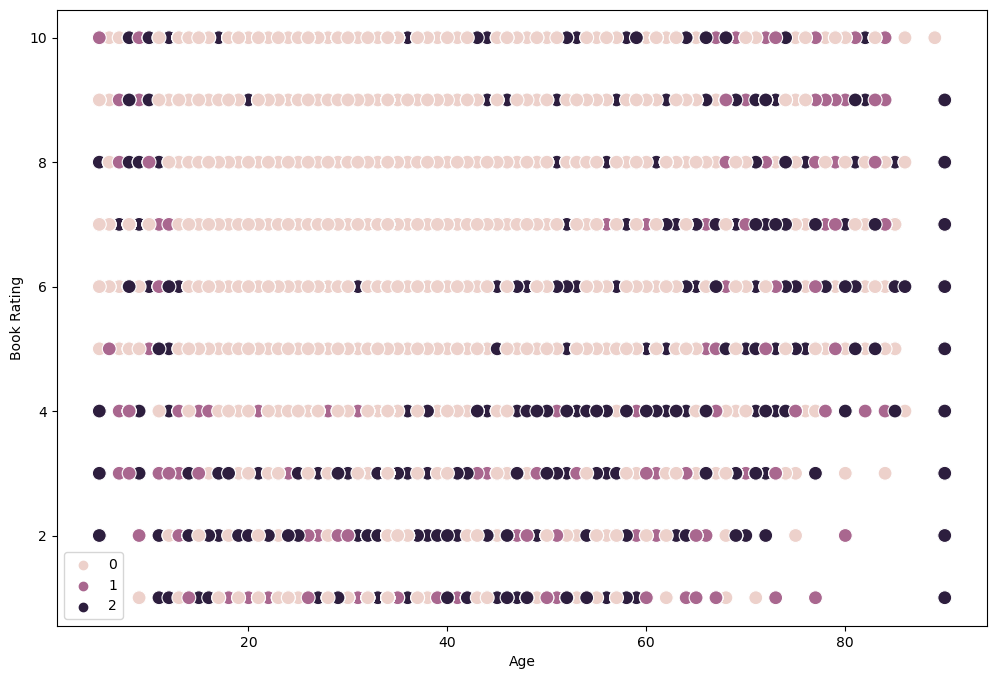

In [16]:
# Plot the clusters for the "Book-Rating" and "Age" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Age'], y = df['Book-Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Book Rating') # Label y-axis.
plt.show()

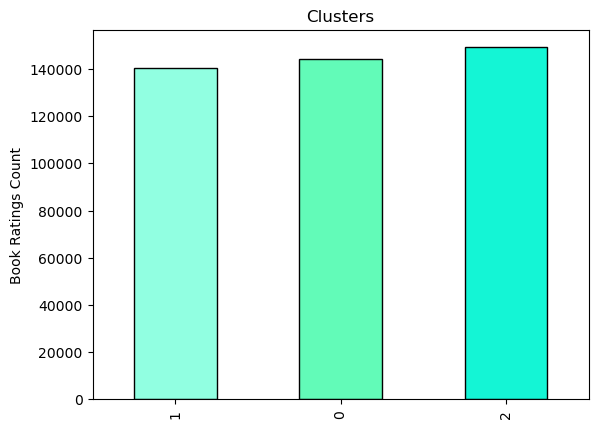

In [17]:
# Create a barchart for the "Book-Rating" and "Age" variables.

colors = ['#91ffe1','#62fbb8','#14f5d5']

rating_age_barchart = df['clusters'].value_counts().sort_values(ascending = True).plot.bar(title = 'Clusters', ylabel='Book Ratings Count', xlabel='', color =colors, edgecolor='black')

# Show the graph.

plt.show()

#### *Do the clusters make sense?* - 'Book-Rating' and 'Age' variables.

- The common denominator being the book ratings from 1 to 10, we are not getting much out the different clusters visually, because there is a line for each rating
- The difference in color from 0 to 2 only shows the notation difference based on the age of the users
- As we can see in the bar chart above, there is little difference between the clusters
- By principle, even if the clusters make sense, it is not insightful for the analysis

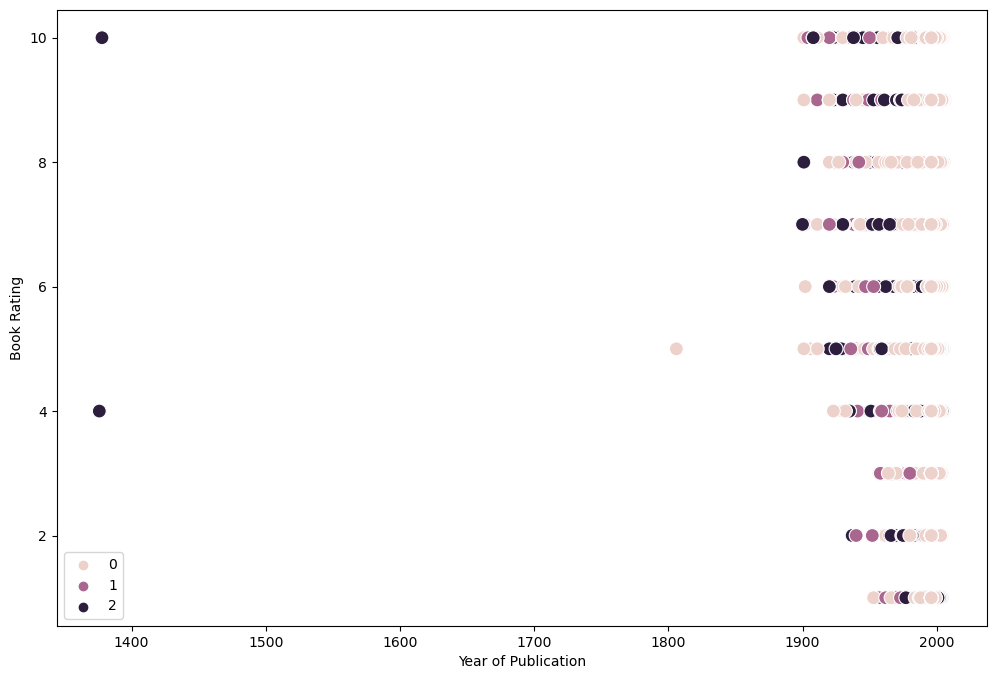

In [18]:
# Plot the clusters for the "yearOfPublication" and "Book-Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['yearOfPublication'], y = df['Book-Rating'], hue = kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year of Publication') 
plt.ylabel('Book Rating') 
plt.show()

In [19]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

#### *Do the clusters make sense?* - 'Book-Rating' and 'yearOfPublication' variables.

- We are also limited here in terms of analysis with the book ratings as the foundation of the clusters
- There is no relationship between those variables

In [20]:
df.groupby('cluster').agg({'yearOfPublication':['mean', 'median'], 
                           'Age':['mean', 'median'],
                           'Book-Rating':['mean', 'median']})

yearOfPublication                Age        Book-Rating       
                         mean  median       mean median        mean median
cluster                                                                   
dark purple       1995.927171  1997.0  36.118231   34.0    7.628445    8.0
pink              1995.653062  1996.0  35.424658   34.0    7.560953    8.0
purple            1995.546535  1996.0  35.479252   34.0    7.613190    8.0

#### Propose what these results could be useful for in future steps of an analytics pipeline.*

- Due to limitations in the data, missing values for the 'yearOfPublication' were substituted with the mean value:
    * If the data were automatically updated with these values and available after 2006, the next steps in the analysis would involve recalculating the most popular years, genres, and the median age of avid readers. This would enable us to provide accurate recommendations based on their reading history.
    * Any alterations in the mean or median book ratings would facilitate personalized adjustments.
    * As a proposed next action, creating a new column that automatically assigns specific numbers to different genres will facilitate a more thorough clustering analysis, better accommodating people's diverse topic interests.